# Exploring features

In [20]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../dumps/16K.csv')

#Colors for plots
RED = "#f6546a"
GREEN = "#bada55"

## Features
Caution the numbers are shifted of 1
- Feature 1 : the DLLs characteristics 1
- Feature 2 : the DLLs characteristics 2
- Feature 3 : the DLLs characteristics 3
- Feature 4 : the DLLs characteristics 4
- Feature 5 : the DLLs characteristics 5
- Feature 6 : the DLLs characteristics 6
- Feature 7 : the DLLs characteristics 7
- Feature 8 : the DLLs characteristics 8
- Feature 9 : the Checksum
- Feature 10 : the Image Base
- Feature 11 : the Base of Code
- Feature 12 : the OS Major version
- Feature 13 : the OS Minor version
- Feature 14 : the Size of Image
- Feature 15 : the Size of Code
- Feature 16 : the Headers
- Feature 17 : the Size Of InitializedData
- Feature 18 : the Size Of UninitializedData
- Feature 19 : the Size Of StackReserve
- Feature 20 : the Size of Stack Commit
- Feature 21 : the Section Alignment
- Feature 22 : the number of standards sections the PE holds
- Feature 23 : the number of non-standards sections the PE holds
- Feature 24 : the ratio between the number of standards sections found and the number of all sections found in the PE under analysis
- Feature 25 : the number of Executable sections the PE holds
- Feature 26 : the number of Writable sections the PE holds
- Feature 27 : the number of Writable and Executable sections the PE holds
- Feature 28 : the number of readable and executable sections
- Feature 29 : the number of readable and writable sections
- Feature 30 : the number of Writable and Readable and Executable sections the PE holds
- Feature 31 : the code section is not executable
- Feature 32 : the executable section is not a code section
- Feature 33 : the code section is not present in the PE under analysis
- Feature 34 : the EP is not in the code section
- Feature 35 : the EP is not in a standard section
- Feature 36 : the EP is not in an executable section
- Feature 37 : the EP ratio between raw data and virtual size for the section of entry point
- Feature 38 : the number of sections having their physical size =0 (size on disk)
- Feature 39 : the number of sections having their virtual size greater than their raw data size
- Feature 40 : the maximum ratio raw data per virtual size among all the sections
- Feature 41 : the minimum ratio raw data per virtual size among all the sections
- Feature 42 : the address pointing to raw data on disk is not conforming with the file alignement
- Feature 43 : the entropy of Code/text sections
- Feature 44 : the entropy of data section
- Feature 45 : the entropy of resource section
- Feature 46 : the entropy of PE header
- Feature 47 : the entropy of the entire PE file
- Feature 48 : the entropy of section holding the Entry point (EP) of the PE under analysis
- Feature 49 - 112 : 64 bytes following the EP, each byte for 1 feature position
- Feature 113 : the number of DLLs imported
- Feature 114 : the number of functions imported found in the import table directory (IDT)
- Feature 115 : the number of malicious APIs imported
- Feature 116 : the ratio between the number of malicious APIs imported to the number of all functions imported by the PE
- Feature 117 : the number of addresses (corresponds to functions) found in the import address table (IAT)
- Feature 118 : the debug directory is present or not
- Feature 119 : the number of resources the PE holds

## DLLs characteristics

In [21]:
labels = ['f1','f2','f3','f4','f5','f6','f7','f8','f31','f32','f33','f34','f35','36','f42','f118']
f = df[labels]
arr = f.apply(pd.Series.value_counts)
x_false = arr.iloc[0].tolist()
x_true = arr.iloc[1].tolist()
total = x_false[0] + x_true[0]
x_false = list(map(lambda x: x/total, x_false))
x_true = list(map(lambda x: x/total, x_true))
print(arr)
plt.bar(labels, x_true, color=GREEN, label="False")
plt.bar(labels, x_false, bottom=x_true, color=RED, label="True")
plt.xlabel("Features")
plt.ylabel("Percentage")
plt.legend()
plt.show()

KeyError: "['36'] not in index"

## Convert continuous values to boolean values
We have 14702 rows in our dataframe, we are going to see the proportion of these value to convert them into a boolean.

In [3]:
#Show current dataframe
df.head()
boolean_df = pd.DataFrame()

### Feature 9

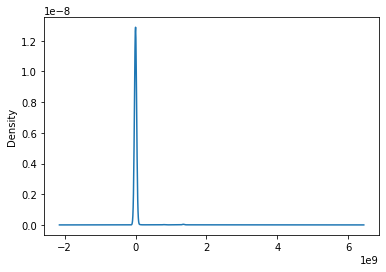

In [4]:
feature = 'f9'
df[feature].plot.kde()

### Feature 9
13362 rows have value **4194304**, it's 91%

In [5]:
feature = 'f9'
boolean_df[feature] = df[feature].apply(lambda x: 1 if x == 4194304 else 0)

### Feature 10
12396 have value 4096 (84%)<br>
1112 have value 8192  (8%)

In [6]:
feature = 'f10'
def cleanF10(x):
    if x == 4096:
        return 1
    elif x == 8192:
        return 2
    return 0
boolean_df = pd.concat([boolean_df, pd.get_dummies(df[feature].apply(cleanF10), prefix=feature)], axis=1)

### Feature 11
10000 rows have value 4 (68%)<br>
3778 rows have value 5 (26%)

In [7]:
feature = 'f11'
def cleanF11(x):
    if x == 4.0:
        return 1
    elif x == 5.0:
        return 2
    return 0
boolean_df = pd.concat([boolean_df, pd.get_dummies(df[feature].apply(cleanF11), prefix=feature)], axis=1)

### Feature 12
11 936 malwares have value 0 (81%) <br>
2574 malwares have value 1 (18%)

In [8]:
feature = 'f12'
def cleanF12(x):
    if x == 0:
        return 1
    elif x == 1:
        return 2
    return 0
boolean_df = pd.concat([boolean_df, pd.get_dummies(df[feature].apply(cleanF12), prefix=feature)], axis=1)

### Feature 13
Here I don't know what to do, so I put 200 000 randomly

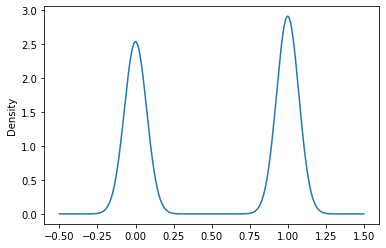

In [9]:
feature = 'f13'
boolean_df[feature] = df[feature].apply(lambda x: 0 if x < 200_000 else 1)
boolean_df[feature].plot.kde()

### Feature 14

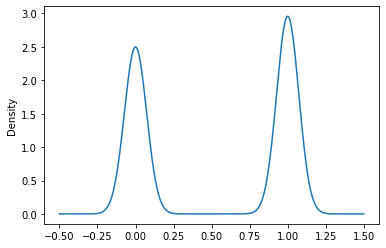

In [10]:
feature = 'f14'
boolean_df[feature] = df[feature].apply(lambda x: 1 if x < 100_000 else 0)
boolean_df[feature].plot.kde()
plt.show()

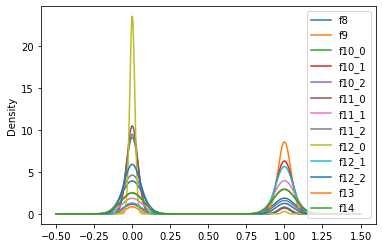

In [11]:
boolean_df.plot.kde()

In [17]:
from sklearn.model_selection import train_test_split
from dl85 import DL85Classifier
data = boolean_df
target = df['label']
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

clf = DL85Classifier(max_depth=1, min_sup=2, verbose=True)
clf.fit(data_train, target_train)
print("train  {}".format(clf.score(data_train, target_train)))
print("test {}".format(clf.score(data_test, target_test)))

DL8.5 fitting: Solution found
train  0.8583574222071076
test 0.8575314518871132


In [18]:
from toBoolean import *
test()

test
